In [95]:
import tensorflow as tf

In [96]:
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [97]:
df = pd.read_csv('C:/Users/ss/Desktop/train.csv/diabetes.csv')

In [98]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [101]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### [2] 데이터 전처리

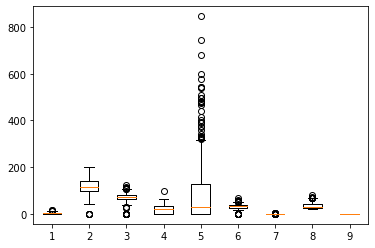

In [102]:
plt.boxplot(df)
plt.show()

In [103]:
df[df['Insulin']>=300].shape

(38, 9)

In [104]:
# 이상치 제거(Insulin 300 이상)
df = df[df['Insulin']<300]

In [105]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
# Insulin 0이 아닌 평균값 
df['Insulin'][df['Insulin']!=0].mean()

125.04775280898876

In [107]:
# 0을 제외한 Features 평균값 0 대체(DiabetesPedigreeFunction Feature 제외)
for i in range(1,8):
    if i != 6:
        df.iloc[:,i][df.iloc[:,i]==0] = df.iloc[:,i].replace(0,df.iloc[:,i][df.iloc[:,i]!=0].mean())      

C:\Users\ss\AppData\Local\Temp\ipykernel_6592\2890702207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,i][df.iloc[:,i]==0] = df.iloc[:,i].replace(0,df.iloc[:,i][df.iloc[:,i]!=0].mean())
C:\Users\ss\AppData\Local\Temp\ipykernel_6592\2890702207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,i][df.iloc[:,i]==0] = df.iloc[:,i].replace(0,df.iloc[:,i][df.iloc[:,i]!=0].mean())
C:\Users\ss\AppData\Local\Temp\ipykernel_6592\2890702207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [108]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,125.047753,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,125.047753,26.6,0.351,31,0
2,8,183.0,64.0,28.918489,125.047753,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [109]:
data = df.iloc[:,:-1]

In [110]:
target = df.iloc[:,-1]

In [111]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,125.047753,33.6,0.627,50
1,1,85.0,66.0,29.000000,125.047753,26.6,0.351,31
2,8,183.0,64.0,28.918489,125.047753,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [112]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [113]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [114]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42, stratify=train_target)

#### 스케일링

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
ss = StandardScaler()

In [119]:
train_input_scaled = ss.fit_transform(train_input)
test_input_scaled = ss.transform(test_input)
val_input_scaled = ss.transform(val_input)

### [3] 모델 생성

In [159]:
model = Sequential()

In [160]:
model.add(Dense(10, activation='relu', input_shape=(8,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [161]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                90        
                                                                 
 dense_22 (Dense)            (None, 30)                330       
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [162]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [163]:
model.fit(train_input_scaled, train_target, epochs=10, validation_data=(val_input,val_target))

Epoch 1/10
15/15 [==============================] - 1s 13ms/step - loss: 0.7192 - accuracy: 0.3919 - val_loss: 6.0345 - val_accuracy: 0.3504
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.6574 - val_loss: 7.8886 - val_accuracy: 0.3504
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6767 - val_loss: 10.1008 - val_accuracy: 0.3504
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.6895 - val_loss: 13.3986 - val_accuracy: 0.3504
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5880 - accuracy: 0.7002 - val_loss: 16.9505 - val_accuracy: 0.3504
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.7066 - val_loss: 20.3698 - val_accuracy: 0.3504
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7152 - val_loss: 23.0380 - val_accuracy: 0.3504
Epoch 8/10
15/

In [164]:
model.evaluate(test_input_scaled, test_target)

5/5 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8014


[0.4411613345146179, 0.801369845867157]